In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore


In [3]:
df = pd.read_csv("dataset_phishing.csv")

In [4]:
X = df.drop(columns=['domain_registration_length','domain_age','url','status'])
y = df['status'].map({'legitimate':0,'phishing':1})

In [5]:
k_best = SelectKBest(score_func=chi2, k=20)  # Change 'k' based on the number of features you want
X_new = k_best.fit_transform(X, y)


In [6]:
# Get selected feature names
selected_featuress = X.columns[k_best.get_support()]
print("Selected Features:", selected_featuress)

Selected Features: Index(['length_url', 'length_hostname', 'ip', 'nb_and', 'nb_eq', 'nb_www',
       'length_words_raw', 'shortest_word_host', 'longest_words_raw',
       'longest_word_path', 'avg_word_path', 'phish_hints', 'nb_hyperlinks',
       'links_in_tags', 'ratio_intMedia', 'ratio_extMedia', 'safe_anchor',
       'web_traffic', 'google_index', 'page_rank'],
      dtype='object')


In [7]:
X = df[
    [
        'length_url', 'length_hostname', 'ip', 'nb_and', 'nb_eq', 'nb_www',
        'length_words_raw', 'shortest_word_host', 'longest_words_raw',
        'longest_word_path', 'avg_word_path', 'phish_hints', 'nb_hyperlinks',
        'links_in_tags', 'safe_anchor',
        'nb_redirection','onmouseover','right_clic','iframe','popup_window'
    ]
]


In [8]:
# Split the data into 70% training and 30% testing sets.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [9]:
# -------------------------
# 5. Train the Random Forest Classifier
# -------------------------
rf_classifier = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_classifier.fit(X_train, y_train)

# -------------------------
# 6. Evaluate the Model
# -------------------------
y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("\nRandom Forest Classifier Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Random Forest Classifier Evaluation:
Accuracy: 0.9140

Confusion Matrix:
[[1567  148]
 [ 147 1567]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1715
           1       0.91      0.91      0.91      1714

    accuracy                           0.91      3429
   macro avg       0.91      0.91      0.91      3429
weighted avg       0.91      0.91      0.91      3429



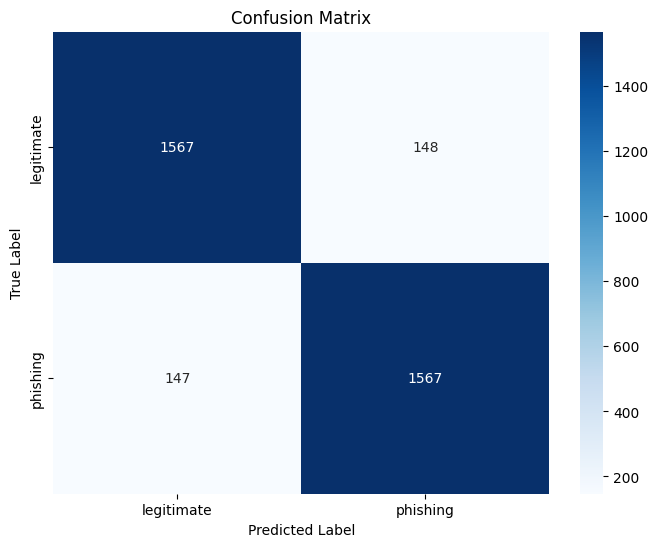

In [10]:
# Define the class labels in the order used during mapping: 0 -> 'legitimate', 1 -> 'phishing'
class_labels = ['legitimate', 'phishing']

# Create a figure for the heatmap
plt.figure(figsize=(8, 6))

# Plot the confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)

# Set labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Display the plot
plt.show()


In [13]:
import pickle
with open("model.pkl", "wb") as f:
    pickle.dump(rf_classifier, f)